# Module 2, Activity 3: Barplots for 1 and 2-Dimensional Categorical Data

Barplots are extremely useful visualisation tools for 1 and 2-dimensional categorical data. As we've seen, data with mixed attributes (integers, strings, datetime objects) can be manipulated in Python using the Pandas library. But Pandas also has plotting capabilities (built upon Matplotlib) Here, we're going to use [built-in Pandas plot calls](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) to generate different kinds of barplots.

## Setup

Let's first load the libraries we will need and the taxis dataset. Note again that we have needed to specify the format of the pickup and dropoff times to be in the 'datetime' format. You should always check your columns are in the required format before starting to make visualisations.

In [9]:
# import packages/libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt

# load (and optionally format) dataset
df = pd.read_csv("data/taxis.csv")
df["pickup"] = pd.to_datetime(df["pickup"])
df["dropoff"] = pd.to_datetime(df["dropoff"])
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:00,2019-03-23 20:27:00,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:00,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:00,2019-03-27 18:00:00,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:00,2019-03-10 01:49:00,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:00,2019-03-30 13:37:00,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [10]:
df.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

## Boxplots for 1D Categorical Data

Let's start with a simple boxplot to explore the difference in the number of people using cash or credit card to pay for their taxi fare.

Remember that we use boxplots to visualise the number of observations in our dataset from different categories. So first, we need to use some Pandas magic to build a data frame which gives us the total number of people who use cash or credit card. First, we use the **groupby** call, to group our the df dataset by payment. But, we also need to tell Python what we want to extract from this call. More information about **groupby** can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html). Since we want the number of people in each payment group, we do this by calling **size()**

In [11]:
df_table = df.groupby(['payment']).size()

df_table

payment
cash           1812
credit card    4577
dtype: int64

We now have a table structure calleddf_table, that gives the count of people by payment. So far so good. Now, we need to reshape this table into a dataframe where we have a column for payment type, and another column with the number of people in each payment type. To do this, we need to call **reset_index**, which formats our table into a Pandas dataframe. Then, we need to rename our count column, from 0 to 'counts'.

In [12]:
df_frame = df_table.reset_index()
df_frame = df_frame.rename({0: 'counts'}, axis=1) 
df_frame

,payment,counts
0,cash,1812
1,credit card,4577


We can now build or first barplot:

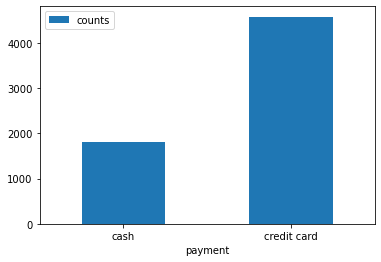

In [13]:
df_frame.plot(x="payment", y = "counts", kind = "bar", rot = 0)
plt.show()

Since Pandas.plot is built on Matplotlib, we can use Matplotlib's Pyplot to change our graph. We imported Pyplot from Matplotlib as **plt** at the beginning of these activities. Using Pyplot, let's add axis labels and a title:

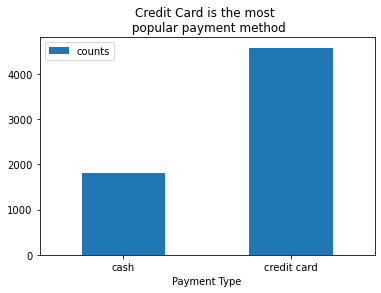

In [14]:
df_frame.plot(x="payment", y = "counts", kind = "bar", rot = 0)
plt.xlabel("Payment Type")
plt.title("Credit Card is the most \n popular payment method")
plt.show()

Here, we're calling a Pandas plot, using df_frame to source data, where our x-axis is payment type, our y-axis is the number of people in each payment group, and the kind of plot we're calling is a barplot. The final argument 'rot = 0' tells the function the angle that we want to rotate our x-axis labels.

**Exercises:**
1) Using pyplot, add a y-axis label to the barplot above. Use the [plt.ylabel help page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) for help. \
2) Let's neaten up the tick labels on the x-axis. Using the [plt.xticks help page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) as a starting point, change the tick labels on the x-axis from 'cash' and 'credit card' to 'Cash' and 'Credit Card'.

What if we want to order the bars from largest to smallest? Then, we'd want the cash bar to go first. First, we would need to change the order of **df_frame**

In [108]:
df_asce = df_frame.sort_values(by = 'counts', ascending = False)
df_asce

,payment,counts
1,credit card,4577
0,cash,1812


Then we can plot:

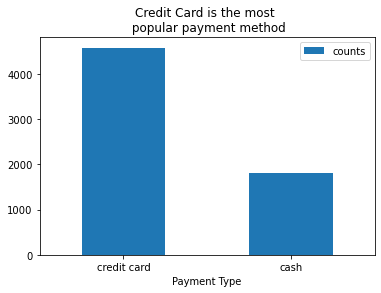

In [110]:
df_asce.plot(x="payment", y = "counts", kind = "bar", rot = 0)
plt.xlabel("Payment Type")
plt.title("Credit Card is the most \n popular payment method")
plt.show()

Do we see this same trend across all boroughs? Let's plot a grouped barplot, we're pickup borough is distinguished by colour. To do that, we need a new dataframe, one which gives us the number of people by payment type and pick up borough:

In [111]:
df_table = df.groupby(['pickup_borough', 'payment']).size().reset_index()

df_table

,pickup_borough,payment,0
0,Bronx,cash,25
1,Bronx,credit card,74
2,Brooklyn,cash,119
3,Brooklyn,credit card,261
4,Manhattan,cash,1397
5,Manhattan,credit card,3839
6,Queens,cash,266
7,Queens,credit card,383


We have one more step before we can use this data. We want to pivot our dataset from long-form, to wide-form. We use the **pivot** call to do this, where we specify the variable names for columns, rows (index) and the values in the cells. 

In [112]:
df_frame2 = df_table.pivot(columns='payment', index='pickup_borough', values=0)
df_frame2

payment,cash,credit card
pickup_borough,,
Bronx,25,74
Brooklyn,119,261
Manhattan,1397,3839
Queens,266,383


<AxesSubplot:xlabel='pickup_borough'>

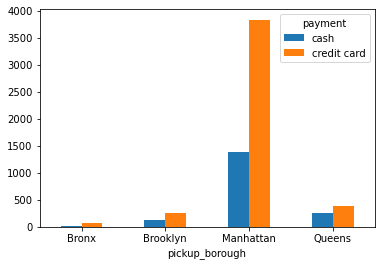

In [113]:
df_frame2.plot(kind = "bar", rot = 0)
plt.show()

**Exercise:** Modify the above command to transpose **df_frame2**, so the rows are payment type and columns are pickup boroughs. Plot the transposed dataframe as a grouped barplot. Using Matplotlib's Pyplot command, neaten the x-axis and tick labels as required, and give the plot a title.

We can easily stack these bars as well, if we're interested in comparing the size of all observations by pickup borough, and we still want to see the different payment types.

<AxesSubplot:xlabel='pickup_borough'>

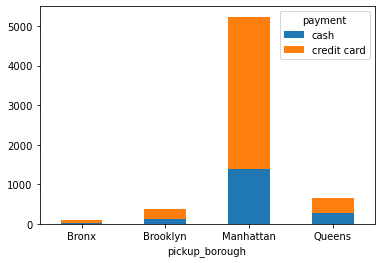

In [114]:
df_frame2.plot(kind = "bar", rot = 0, stacked = True)
plt.show()

**Exercise:** Generate a table of counts for two variables other than pickup borough and payment, and generate grouped and stacked barplots of the variables.

It's hard to see the relative difference in payment type between each group in the figure above - the Bronx might have the same payment composition as Manhattan, but we wouldn't know. To see this, we need a stacked percentage plot. Again, we need to transform our data with a little bit with some Pandas calls, so we have the percentage of all payments that were either cash or credit card in each pickup borough. We'll leave it to you to generate this final figure, using what you've learned so far, in the Exercises below.

In [91]:
df_rel = df_frame2.apply(lambda x: x*100/sum(x), axis=1)
df_rel

payment,cash,credit card
pickup_borough,,
Bronx,25.252525,74.747475
Brooklyn,31.315789,68.684211
Manhattan,26.680672,73.319328
Queens,40.986133,59.013867


**Exercise:** 
1) In your own words, explain what the apply function is doing in the above command. What would you need to change to the above command if you wanted the percentage of all cash payments in Brooklyn?\
2) Using df_rel and what we have learned so far, generate a stacked barplot of the percentage of all payments that were either cash or credit card in each pickup borough. Which borough has the highest percentage of cash payments?

## Barplots with Seaborn

Seaborn is a wrapper around both Matplotlib (for visualisation) and Pandas (for dataset manipulation). Seaborn's **countplot** function is an excellent tool for creating barplots quickly with a Pandas dataframe. Seaborn will take a Pandas dataset and do the counting and grouping for you, which works really well for most barplots.

**Exercise:** Work through the example code for Seaborn's countplot function, available [here](https://seaborn.pydata.org/generated/seaborn.countplot.html), using the taxis dataset you've loaded and prepared for this Module.